In [1]:
config_name = 'median_patches32_es32'
full_or_patch  = 'patch'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.insert(1, '/home/quahb/caipi_denoising/src')

from utils.data_io import load_dataset

dataset_folder = os.path.join('/home/quahb/caipi_denoising/data/datasets/', config_name)

In [3]:
X, y = load_dataset(dataset_folder)
X.shape, y.shape

    Loading patches...
Found 11718 files to load at /home/quahb/caipi_denoising/data/datasets/median_patches32_es32
Loading patches complete.
    Dataset size: (1980342, 32, 32, 1)
Found 11718 files to load at /home/quahb/caipi_denoising/data/datasets/median_patches32_es32
Loading patches complete.
    Dataset size: (1980342, 32, 32, 1)


((1980342, 32, 32, 1), (1980342, 32, 32, 1))

In [4]:
def plot_patches(X):
    '''
    plot first row * col patches which form a single image
    '''
    subj_i = 15

    rows = 13
    cols = 13
    img_i = 169 * subj_i


    figure, axis = plt.subplots(rows, cols, figsize=(20,20))
    for i in range(rows):
        for j in range(cols):
            axis[i, j].imshow(X[img_i], cmap='gray')
            img_i += 1

    plt.show()
    
def plot_slices(X):
    '''
    plot first row * col full slices
    '''
    slc_i = 100 # initial slice to start from

    rows = 6
    cols = 2

    figure, axis = plt.subplots(rows, cols, figsize=(18,50))
    for i in range(rows):
        for j in range(cols):
            axis[i, j].imshow(X[slc_i], cmap='gray')
            slc_i += 1

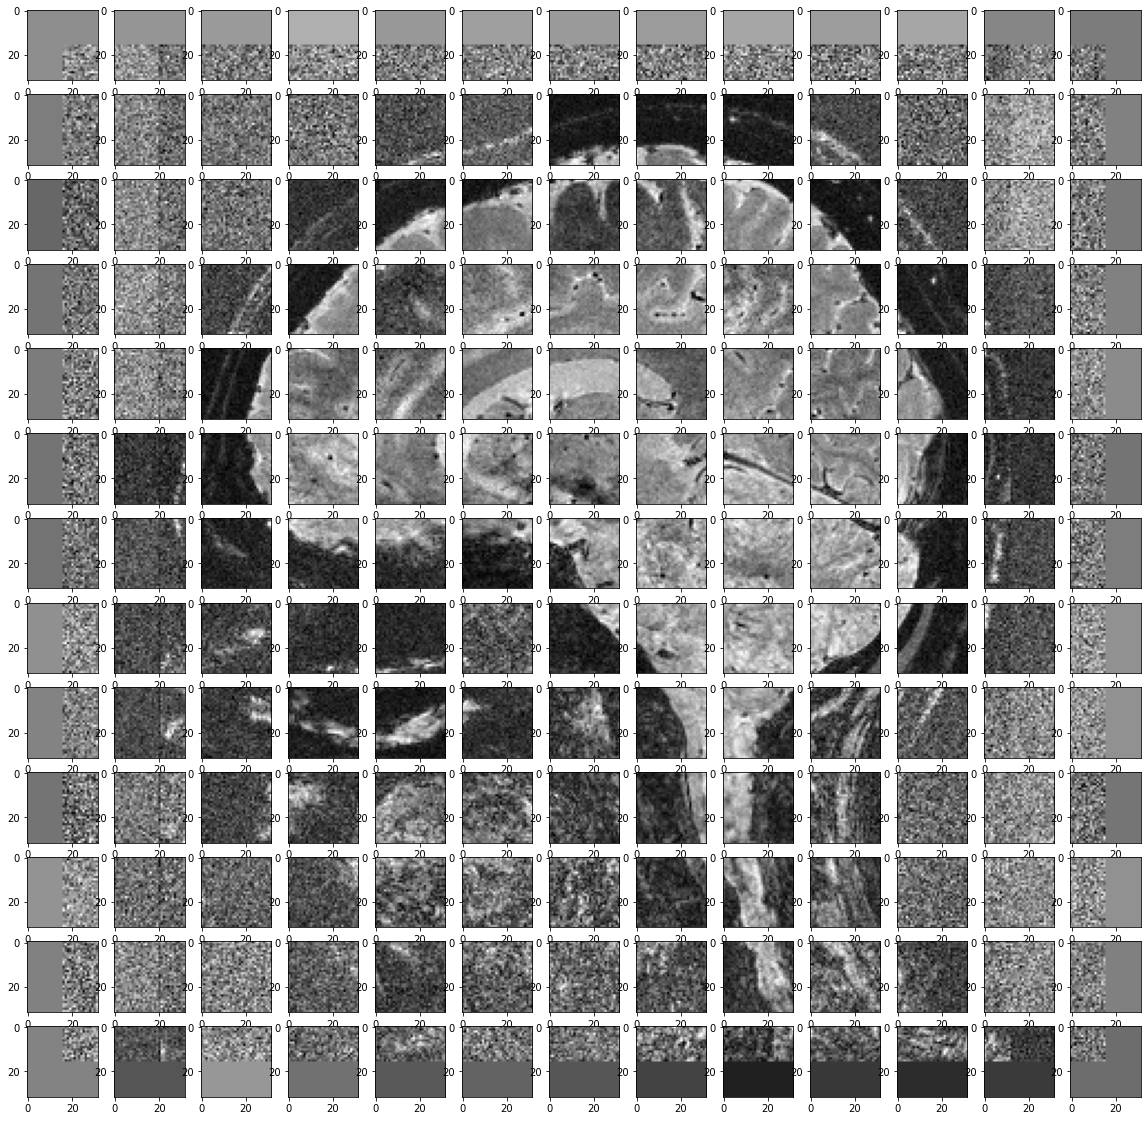

In [5]:
if full_or_patch == 'full':
    plot_slices(X)
else:
    plot_patches(X)